In [27]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv('IT-salaries-in-EU-2018.csv')

In [11]:
# 1.  (1 điểm) Đọc dữ liệu và hiển thị 5 dòng dữ liệu đầu tiên.
df.head()

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer


In [21]:
# 2.  (3 điểm) Tìm hiểu thông tin về dữ liệu:
# a.  (1đ)  Dữ liệu  bao  gồm những  thuộc tính  nào? 
print("các cột:", df.columns)
quantitative = df.select_dtypes(include=['number']).columns.tolist()  # Dữ liệu định lượng (numerical - có thể đo lường):
qualitative = df.select_dtypes(exclude=['number']).columns.tolist()  # Dữ liệu định tính (categorical - mô tả đặc điểm):

print("Dữ liệu định lượng:", quantitative)
print("Dữ liệu định tính:", qualitative)

các cột: Index(['Timestamp', 'Age', 'Gender', 'City', 'Position', 'Years of experience',
       'Your level', 'Current Salary', 'Salary one year ago',
       'Salary two years ago', 'Are you getting any Stock Options?',
       'Main language at work', 'Company size', 'Company type'],
      dtype='object')
Dữ liệu định lượng: ['Age', 'Years of experience', 'Current Salary', 'Salary one year ago', 'Salary two years ago']
Dữ liệu định tính: ['Timestamp', 'Gender', 'City', 'Position', 'Your level', 'Are you getting any Stock Options?', 'Main language at work', 'Company size', 'Company type']


In [23]:
# b. Có bao nhiêu 49 loại công ty (company type) trong khảo sát
company_types = df["Company type"].unique()
num_company_types = len(company_types)

print("Số lượng loại công ty:", num_company_types)
print("Danh sách loại công ty:", company_types)

Số lượng loại công ty: 50
Danh sách loại công ty: ['Product' 'Ecom retailer' 'Insurance' nan 'Startup' 'Agency' 'Big Tech'
 'Consultancy' 'Corporation' 'Outsource' 'Industry' 'E-Commerce firm'
 'Consulting' 'Internal development for a non-IT company'
 'Personaldienstleister' 'ipo' 'e-commerce' 'Product and Projects'
 'E-Commerce' 'Development' 'Consulting Company' 'IT Dienstleistungen '
 'Manufacturing' 'Stock market ' 'telecom operator' 'Ecommerce'
 'Outsourcing' 'Outsorce' 'consulting' 'GmbH' 'IT Consulting '
 'IT Consultancy ' 'IT Service Provider' 'non-IT, manufacturing' 'Bank '
 'IT-Beratung' 'Technology Consulting' 'outsource' 'IT Consultants'
 'Hochschule/university' 'ISP' 'Fin Tech' 'Blockchain technology' 'Retail'
 'Consult' 'Project-based software development' 'Automotive' 'OEM'
 'Consulting (banking)' 'IT Consulting']


In [46]:
#Câu 3
print("Câu 3")
it['Gender'].value_counts()
#Nam 646, nữ 105, tổng số người là 751
print("Tỷ lệ nam và nữ xuất  hiện trong  khảo sát")
nam = round(646/751*100, 2)
nu = round(105/751*100, 2)

print("Tỷ lệ nam xuất  hiện trong  khảo sát: ", nam, "%")
print("Tỷ lệ nữ xuất  hiện trong  khảo sát: ", nu, "%")



Câu 3
Tỷ lệ nam và nữ xuất  hiện trong  khảo sát
Tỷ lệ nam xuất  hiện trong  khảo sát:  86.02 %
Tỷ lệ nữ xuất  hiện trong  khảo sát:  13.98 %


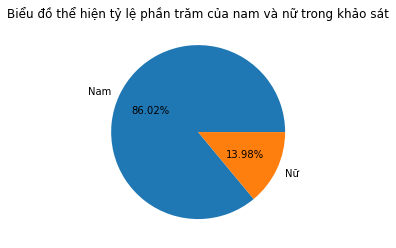

In [44]:
import matplotlib.pyplot as plt
y = np.array([nam, nu])
mylabels = ["Nam", "Nữ"]
plt.title("Biểu đồ thể hiện tỷ lệ phần trăm của nam và nữ trong khảo sát")
plt.pie(y, labels = mylabels, autopct='%1.2f%%')
plt.show()

Gender
M    86.018642
F    13.981358
Name: proportion, dtype: float64


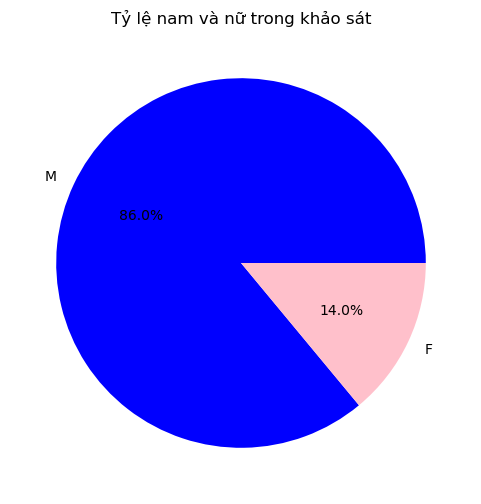

In [29]:
# Đếm số lượng mỗi giới tính
gender_counts = df["Gender"].value_counts(normalize=True) * 100  # Chuyển thành %

print(gender_counts)

# Vẽ biểu đồ tròn (Pie Chart)
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=["blue", "pink"])
plt.title("Tỷ lệ nam và nữ trong khảo sát")
plt.show()

In [31]:
# 4.  (2.0 đ) Để so sánh mức lương của nam và nữ trong ngành IT:
# Tính toán thống kê
salary_stats = df.groupby("Gender")["Current Salary"].describe()
print(salary_stats)


        count          mean           std      min      25%      50%      75%  \
Gender                                                                          
F       104.0  57272.903846  17474.380683  10300.0  47287.5  55400.0  65000.0   
M       643.0  70144.544323  21236.965222  13000.0  60000.0  68000.0  77000.0   

             max  
Gender            
F       120000.0  
M       200000.0  


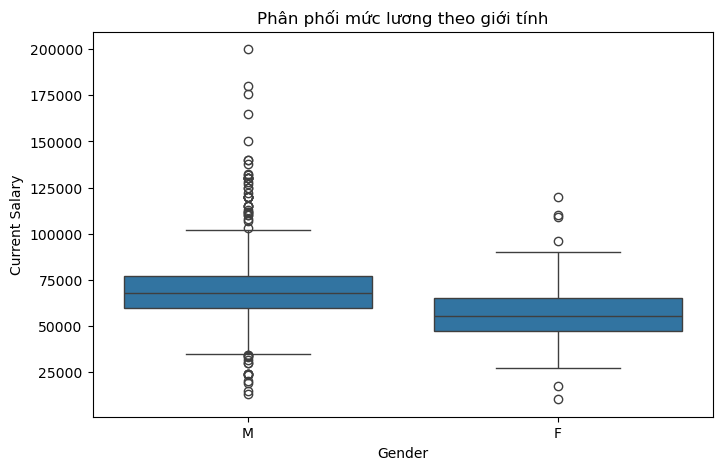

In [37]:
# 4.2) Trực quan hóa mức lương nam và nữ
plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="Current Salary", data=df)
plt.title("Phân phối mức lương theo giới tính")
plt.show()


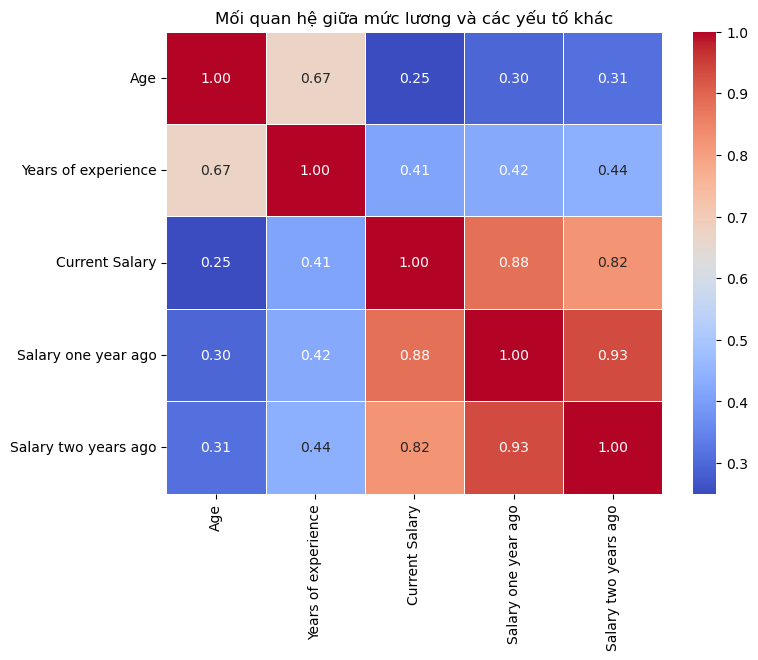

In [41]:
# 5) Các yếu tố ảnh hưởng đến mức lương
# Tính ma trận tương quan
corr_matrix = df.corr(numeric_only=True)
# Vẽ heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mối quan hệ giữa mức lương và các yếu tố khác")
plt.show()
# Nếu Current Salary có tương quan mạnh với Years of experience, Age → Kinh nghiệm & tuổi tác có ảnh hưởng đến lương.
# Nếu Company type ảnh hưởng mạnh → Loại công ty quyết định mức lương.